In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree
  !pip install geopandas
  !pip install contextily

In [2]:
import contextily as cx
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

Downloaded data/upath17.shp
Downloaded data/upath17.shx
Downloaded data/upath17.dbf
Downloaded data/upath17.prj
Downloaded data/umbra17.shp
Downloaded data/umbra17.shx
Downloaded data/umbra17.dbf
Downloaded data/umbra17.prj


### Data Pre-Processing

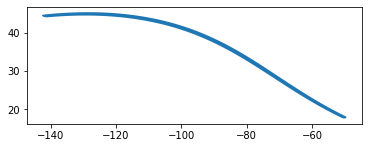

In [7]:
path_shapefile_path = os.path.join(data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf.plot()


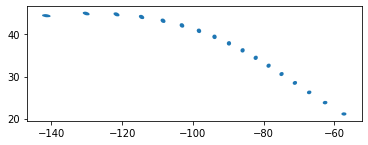

In [8]:
umbra_shapefile_path = os.path.join(data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf.plot()

## Create a Multi-Layer Map

We can show a GeoDataFrame using the `plot()` method

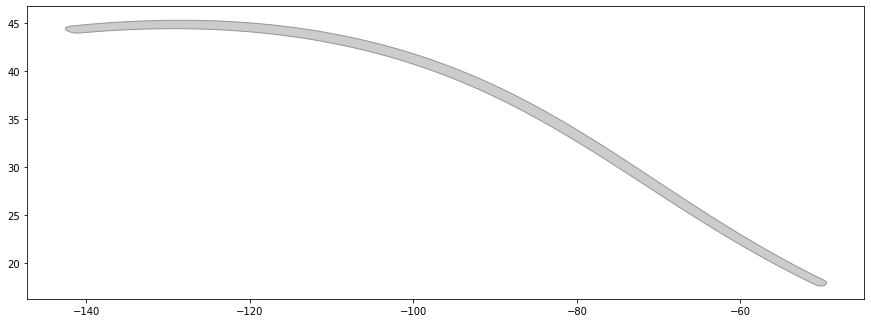

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=1.0)
plt.show()

To add another layer to our plot, we can simply render another GeoDataFrame on the same Axes.

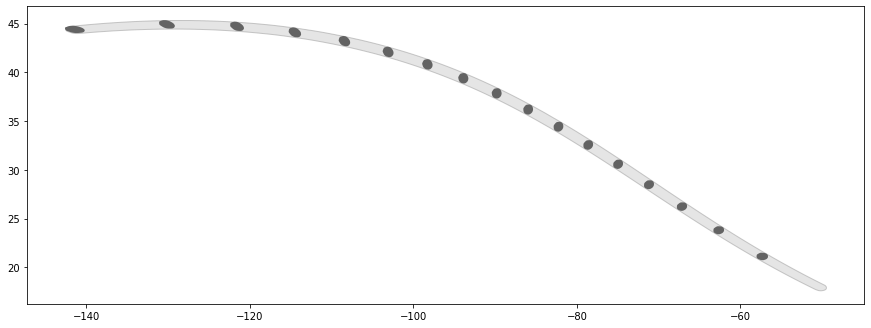

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#636363', edgecolor='none')
plt.show()

## Add a Basemap

The visualization is not useful as it is missing context. We want to overlay this on a basemap to understand where the eclipse was visible from. We can choose from a variety of basemap tiles. There are over 200 basemap styles included in the library. Let’s see them using the `providers` property.

In [12]:
basemap_providers = cx.providers
basemap_providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

For overlaying the eclipse path, let’s use the OpenTopoMap basemap. We need to specify a CRS for the map. For now, let’s use the CRS of the original shapefile.

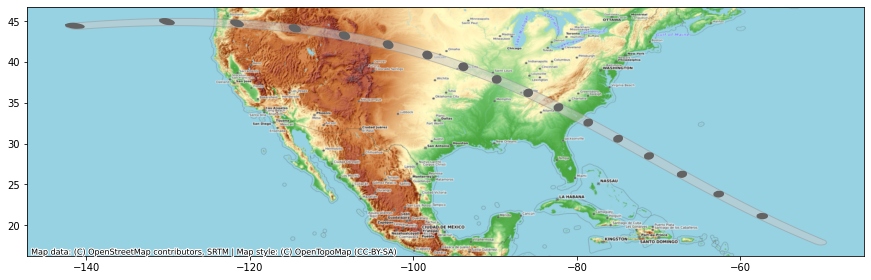

In [13]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_gdf.crs, source=cx.providers.OpenTopoMap)
plt.show()

The web tiles for the basemap are in the Web Mercator CRS (EPSG:3857). When you request them in a different CRS, they are warped to the requested CRS. This may cause the labels to not be legible in some cases. Instead, we can request the tiles in their original CRS and reproject our data layer to its CRS.

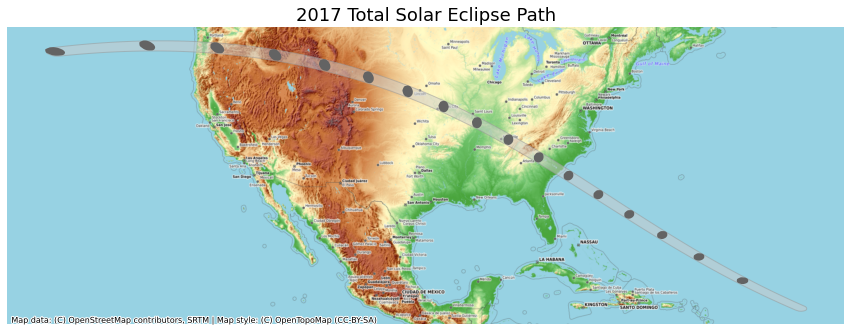

In [15]:
path_reprojected = path_gdf.to_crs('EPSG:3857')
umbra_reprojected = umbra_gdf.to_crs('EPSG:3857')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,8)

path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_reprojected.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.OpenTopoMap)
ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()

Instead of the OpenTopoMap, create a visualization using the Toner basemap from Stamen. Save the resulting visualization as a PNG file `eclipse_path.png`

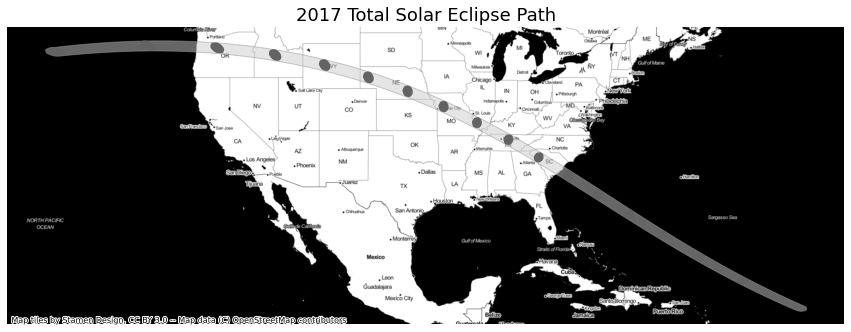

In [18]:
path_reprojected = path_gdf.to_crs('EPSG:3857')
umbra_reprojected = umbra_gdf.to_crs('EPSG:3857')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,8)

path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_reprojected.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.Stamen.Toner)
ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)
stamen_eclipse_map = 'Stamen_Eclipse_Map.png'
plt.savefig(stamen_eclipse_map)
plt.show()